In [4]:
import torch
import torchvision #has bunch of datasets for vision tasks
from torchvision import transforms, datasets

In [8]:
train_data = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test_data = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

9913344it [00:01, 6854831.62it/s]                             


Extracting MNIST\raw\train-images-idx3-ubyte.gz to MNIST\raw



29696it [00:00, 29754909.60it/s]         

Extracting MNIST\raw\train-labels-idx1-ubyte.gz to MNIST\raw




1649664it [00:00, 4837746.88it/s]                             


Extracting MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST\raw



5120it [00:00, ?it/s]                   

Extracting MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST\raw



## Why batch_size
There are two major reasons why you can't just go and pass your entire dataset at once to your neural network:

- Neural networks shine and outperform other machine learning techniques because of how well they work on big datasets. Gigabytes. Terabytes. Petabytes! When we're just learning, we tend to play with datasets smaller than a gigabyte, and we can often just toss the entire thing into the VRAM of our GPU or even more likely into RAM.
Unfortunately, in practice, you would likely not get away with this.

- The aim with neural networks is to have the network generalize with the data. We want the neural network to actually learn general principles. That said, neural networks often have millions, or tens of millions, of parameters that they can tweak to do this. This means neural networks can also just memorize things. While we hope neural networks will generalize, they often learn to just memorize the input data. Our job as the scientist is to make it as hard as possible for the neural network to just memorize.

This batching helps because, with each batch, the neural network does a back propagation for new, updated weights with hopes of decreasing that loss.

In [9]:
trainset = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test_data, batch_size=10, shuffle=False)

In [10]:
#Since batch_size is 10 we get 10 samples as output
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [11]:
X, y = data[0][0], data[1][0] #data[0] is a bunch of features for things and data[1] is all the targets.

print(data[1])

tensor([2, 5, 8, 3, 5, 6, 8, 5, 8, 9])


In [13]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


HOwever if you loaded an image and converted it to grayscale and saved it as tensor you would have got 28*28. But here we get 1*28*28 beacuse that's how pytorch works. Hence we will reshape it.

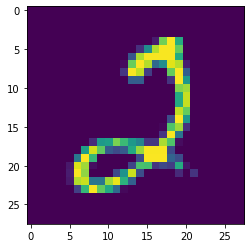

In [21]:
import matplotlib.pyplot as plt  # pip install matplotlib

plt.imshow(data[0][0].view(28,28))
#plt.imshow(data[0][0][0])
plt.show()

So, for our checklist:

- We've got our data of various featuresets and their respective classes.
- That data is all numerical.
- We've shuffled the data.
- We've split the data into training and testing groups.
- Is the data scaled? - the neural network likes data to be scaled between 0 and 1 or -1 and 1. Raw imagery data is usually RGB, where each pixel is a tuple of values of 0-255, which is a problem. 0 to 255 is not scaled.
- Is the data balanced? - make sure there are the same number of examples for each classifications in training.

In [22]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}


for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100.0}%")

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
0: 9.871666666666666%
1: 11.236666666666666%
2: 9.93%
3: 10.218333333333334%
4: 9.736666666666666%
5: 9.035%
6: 9.863333333333333%
7: 10.441666666666666%
8: 9.751666666666667%
9: 9.915000000000001%
